
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [5]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [6]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

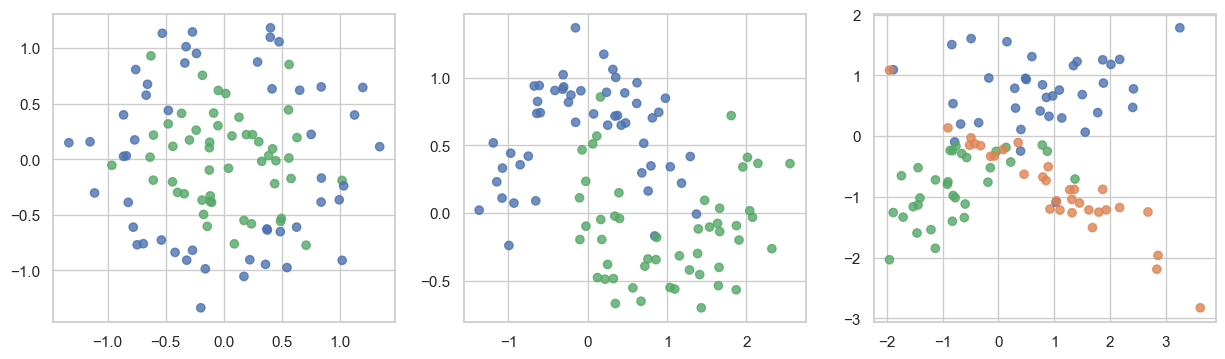

In [8]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [9]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

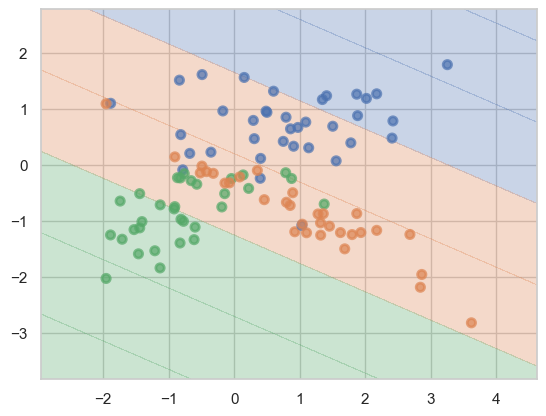

In [10]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

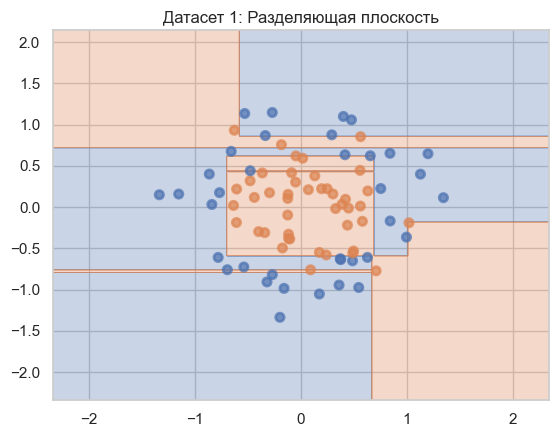

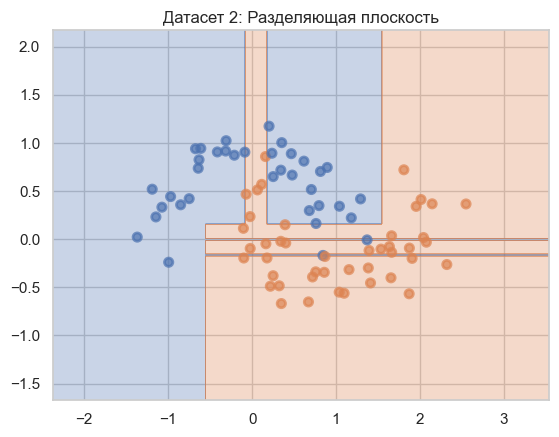

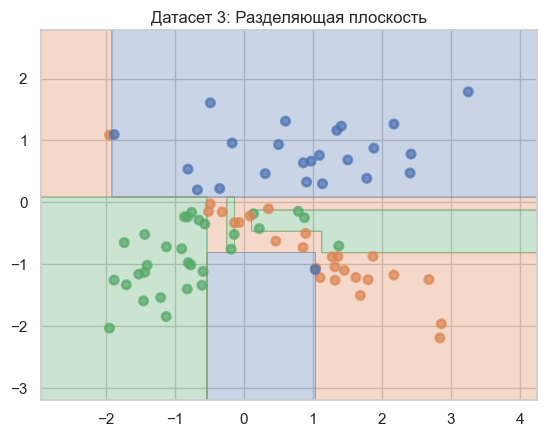

Accuracies (train/test податасетно): [(1.0, 0.65), (1.0, 0.95), (1.0, 0.7)]


In [14]:
results = []

for i, (X, y) in enumerate(datasets):
    #Разбиение на трейн тест
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Обучение
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    # Вычисление аккураси
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    
    results.append((train_accuracy, test_accuracy))
    
    # Построение графика
    plt.figure()
    plot_surface(clf, X_train, y_train)
    plt.title(f'Датасет {i+1}: Разделяющая плоскость')
    plt.show()
    
print(f'Accuracies (train/test податасетно): {results}')

__Ответ:__ очень сильно переобучились, можно в некст итерациях ограничить глубину дереьвев или запихнуть их в ансамбль чтобы уменьшить ситуацию с переобучением

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

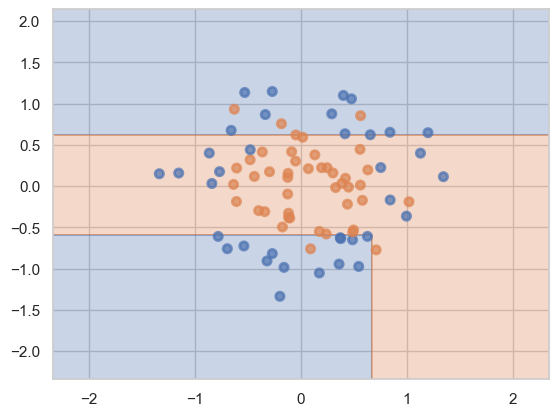

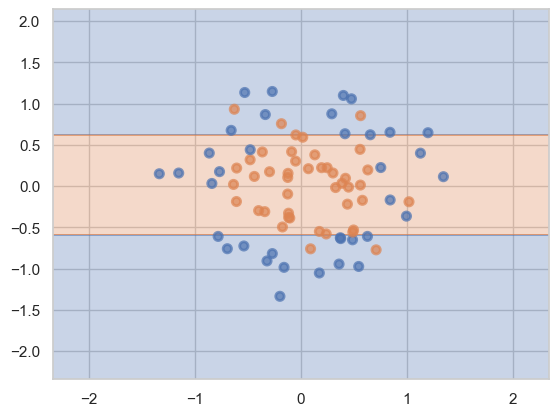

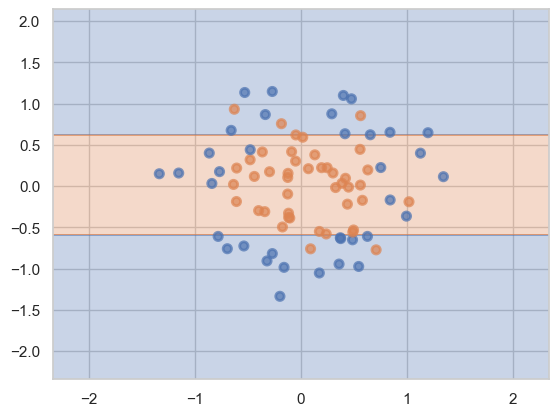

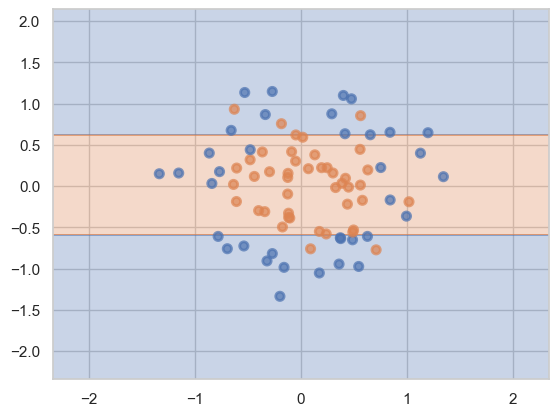

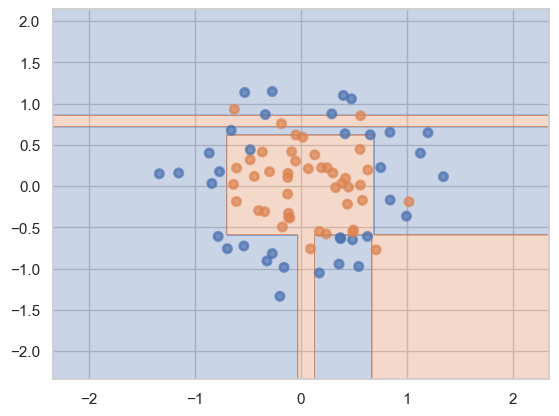

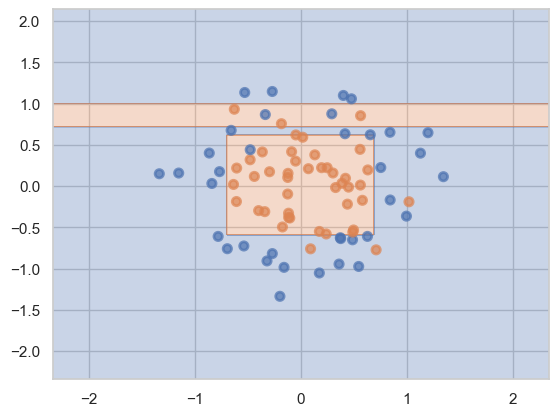

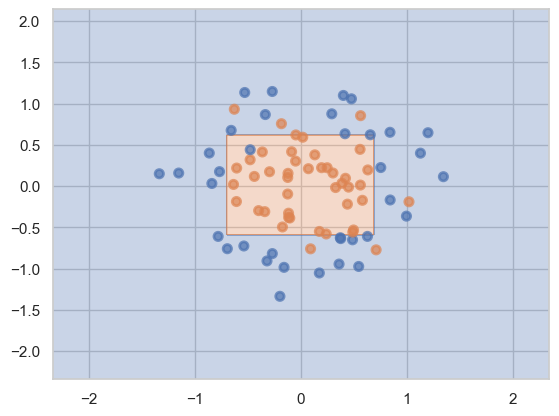

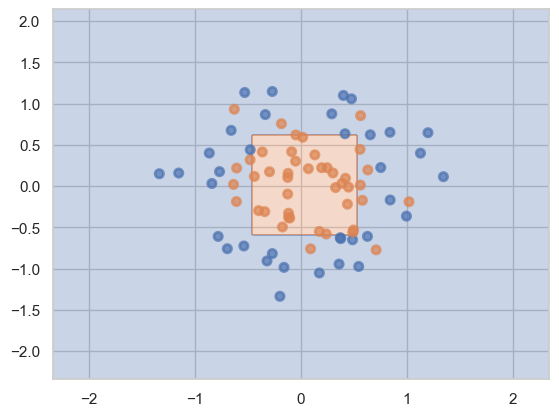

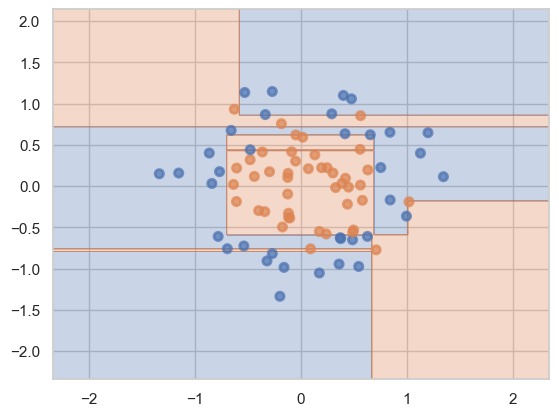

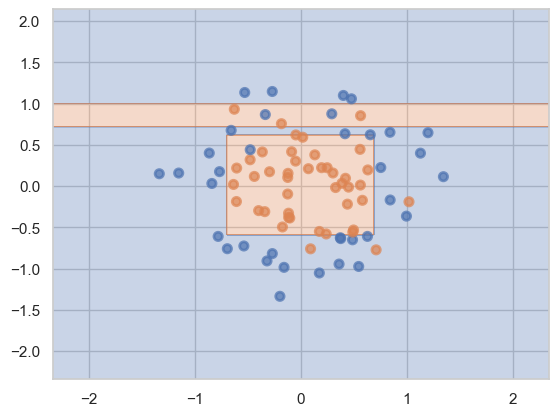

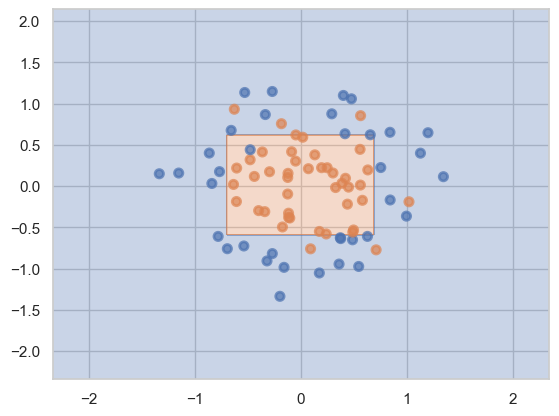

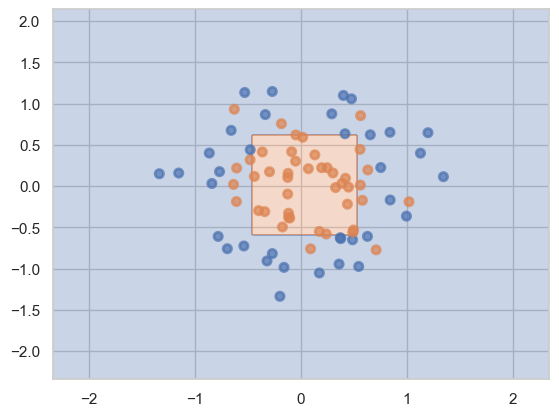

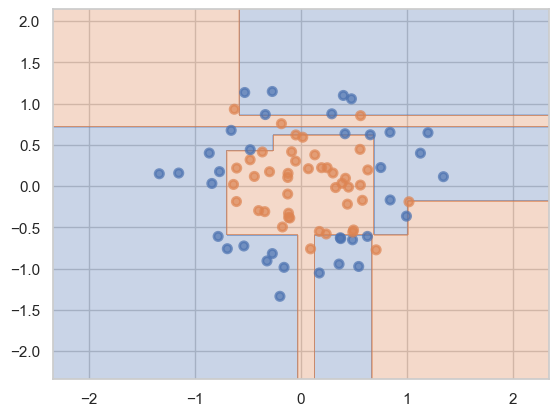

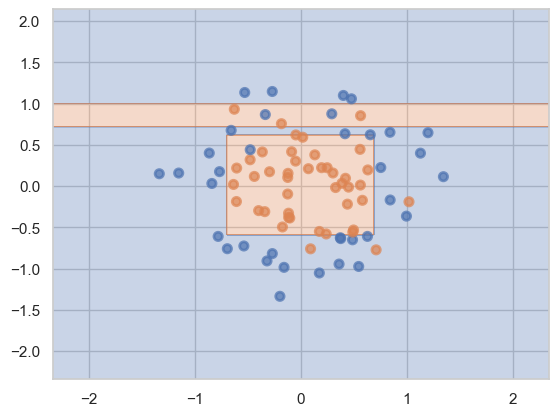

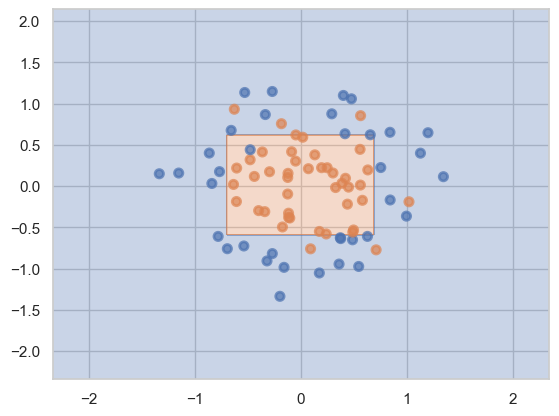

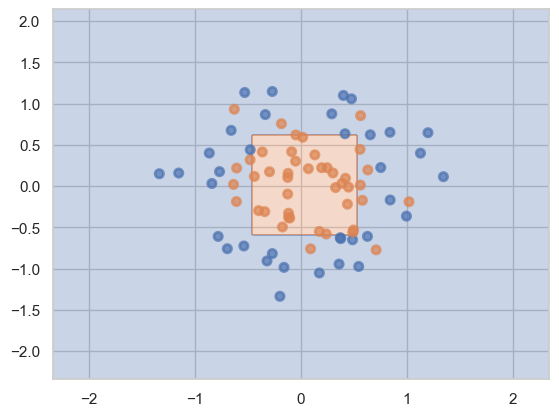

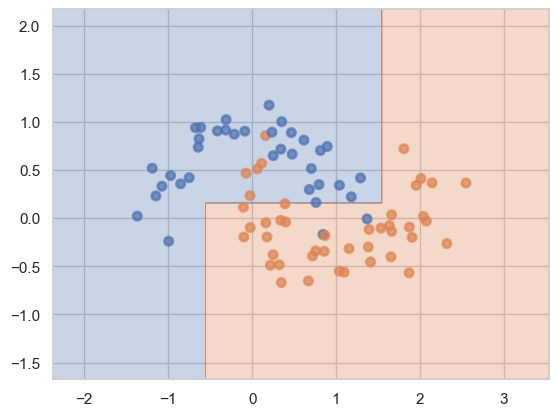

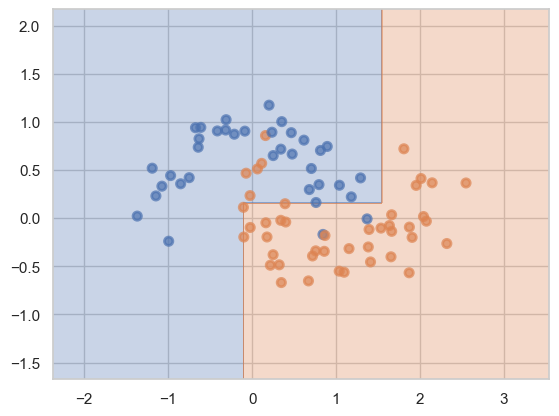

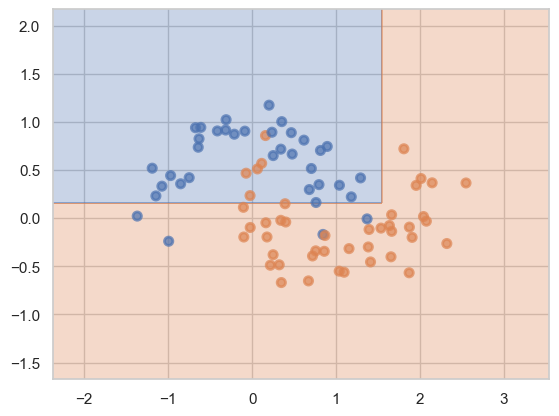

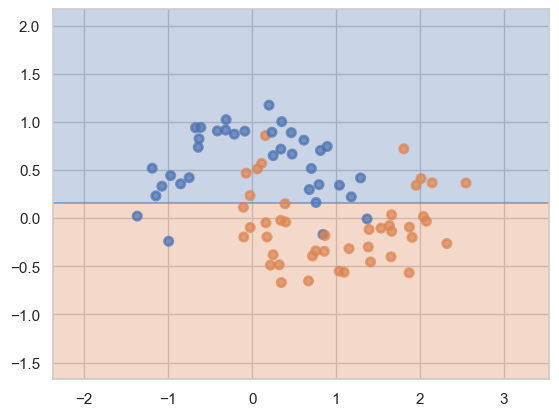

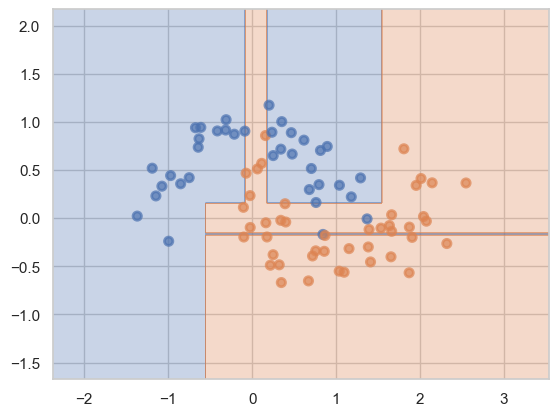

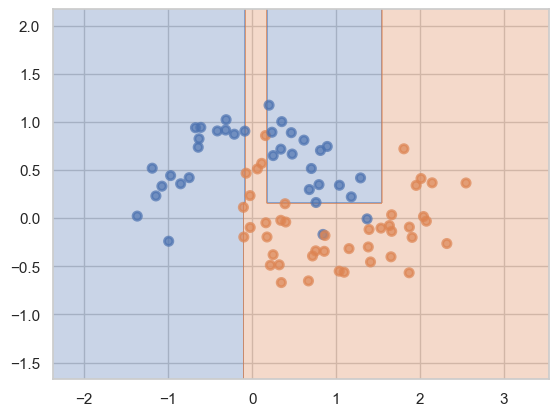

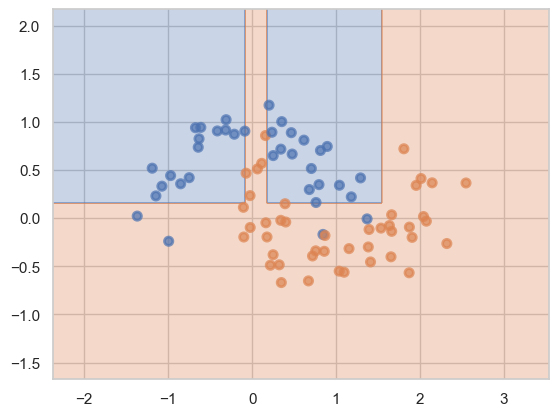

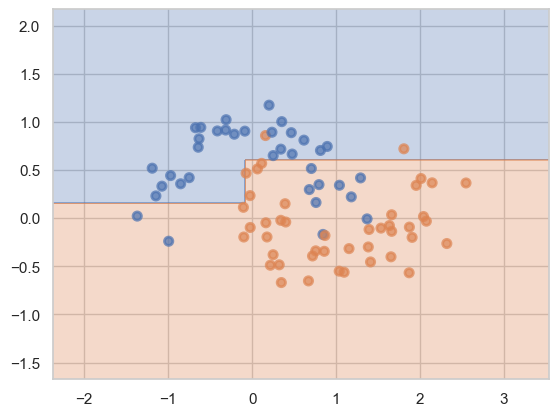

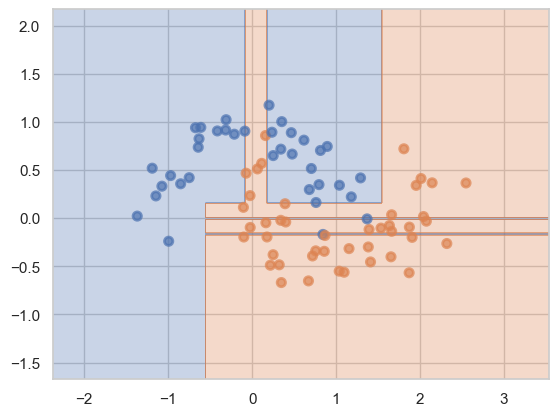

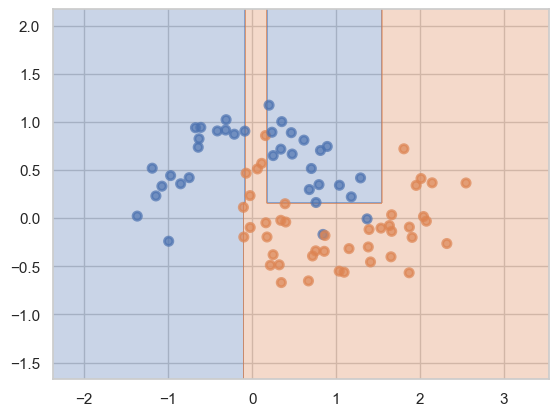

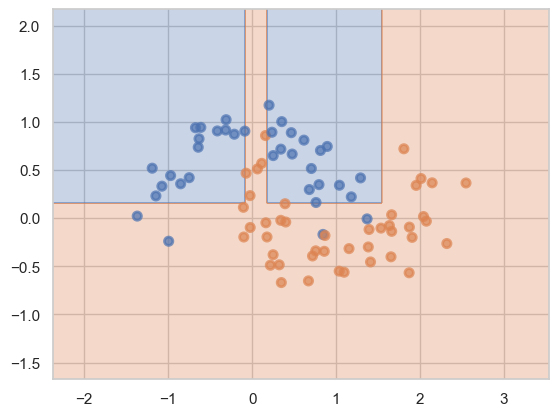

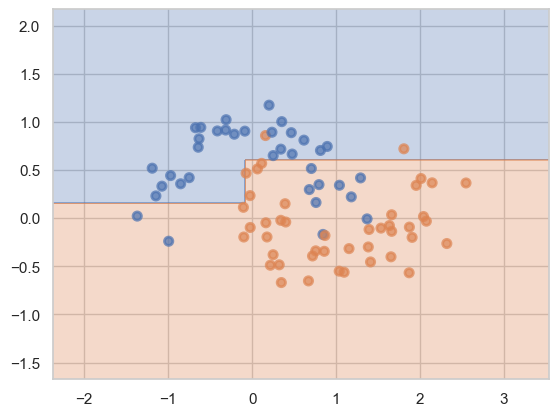

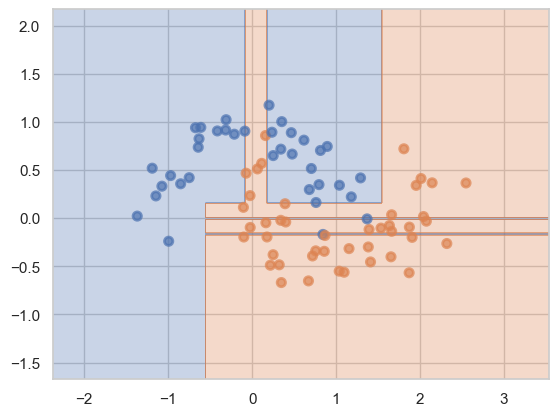

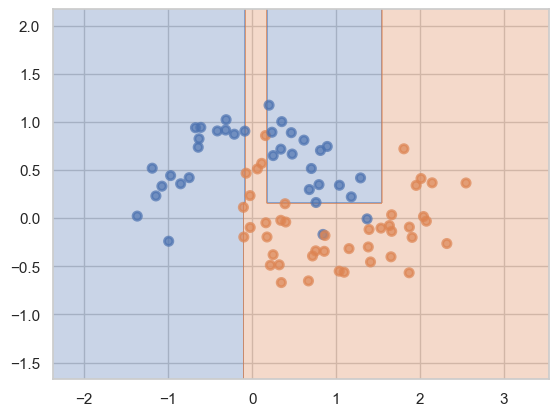

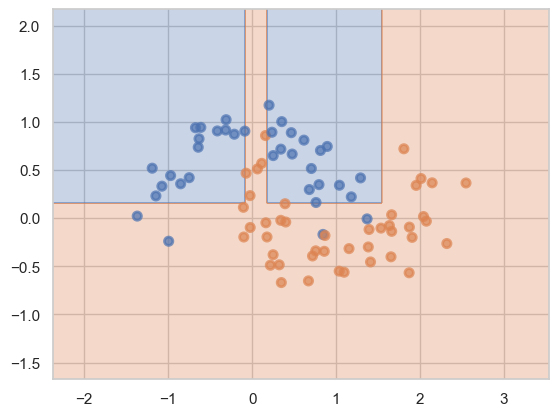

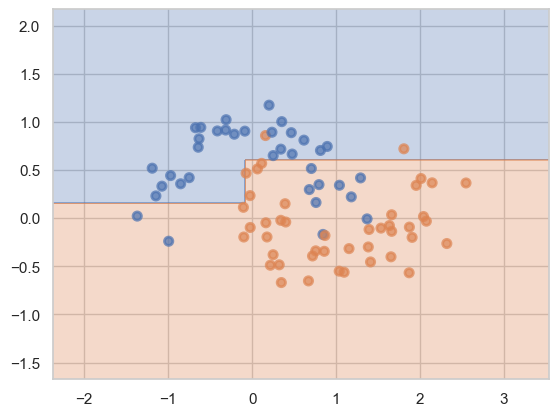

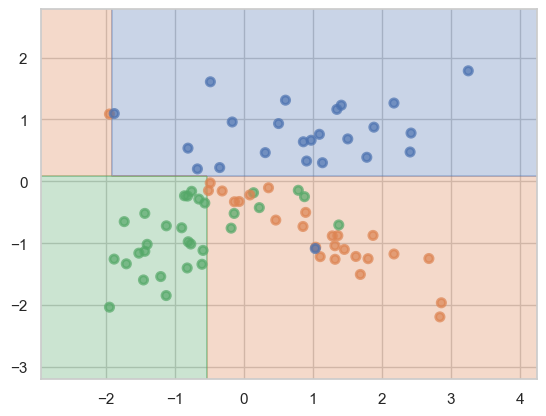

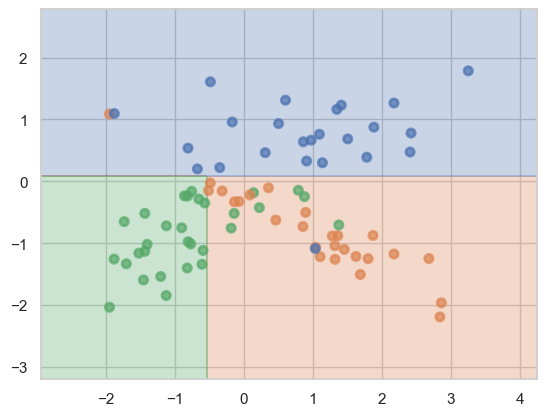

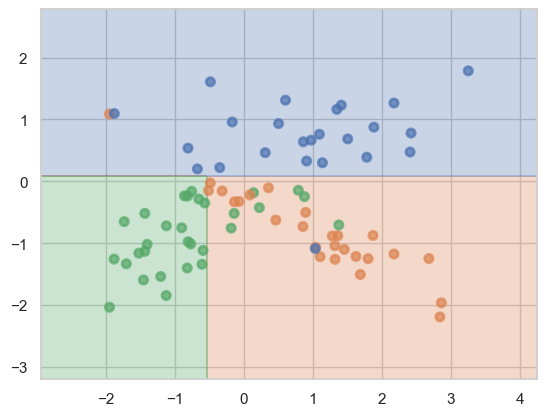

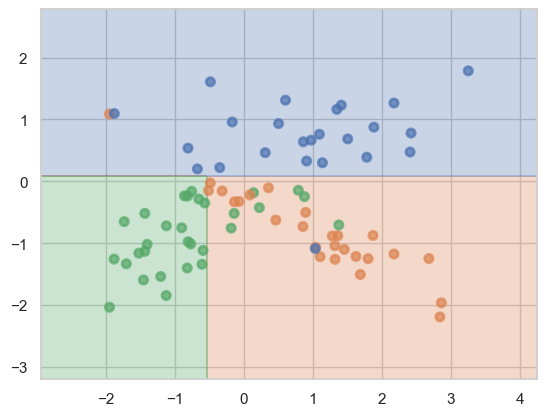

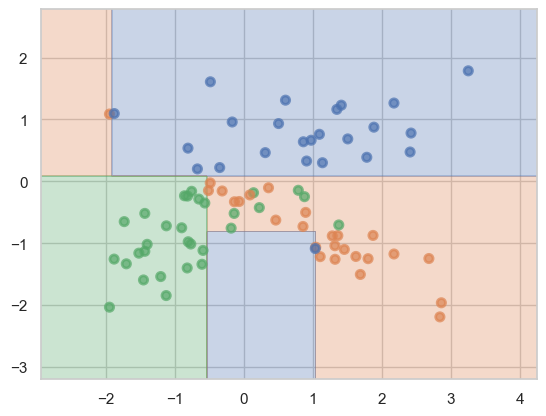

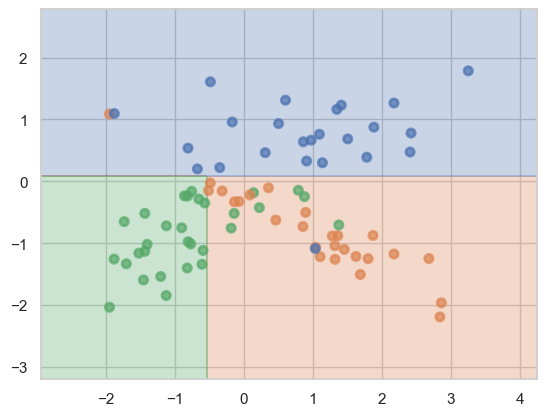

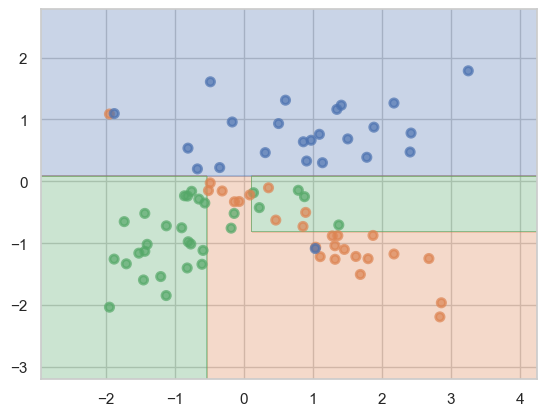

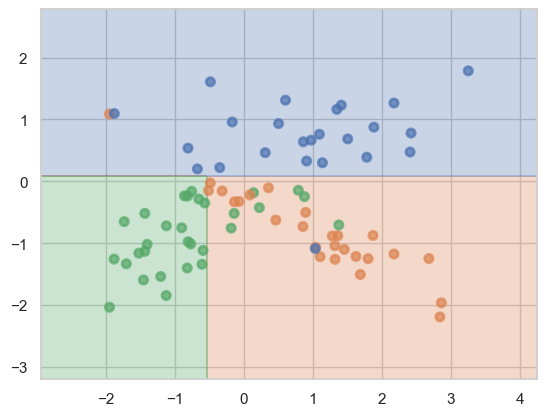

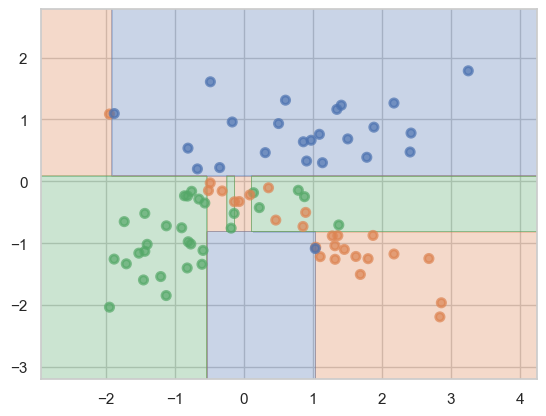

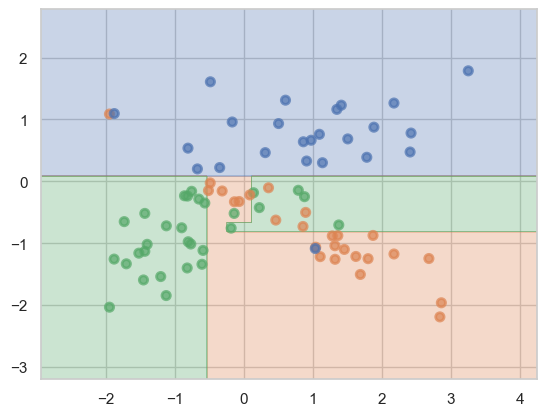

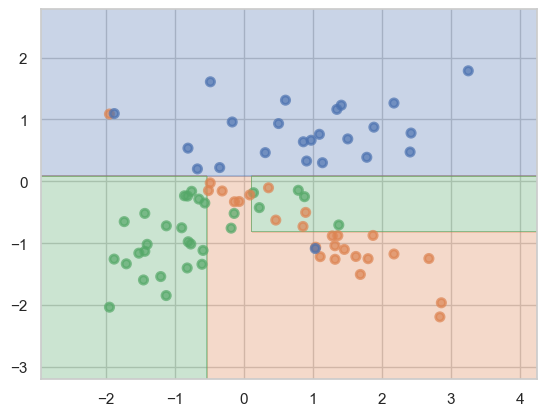

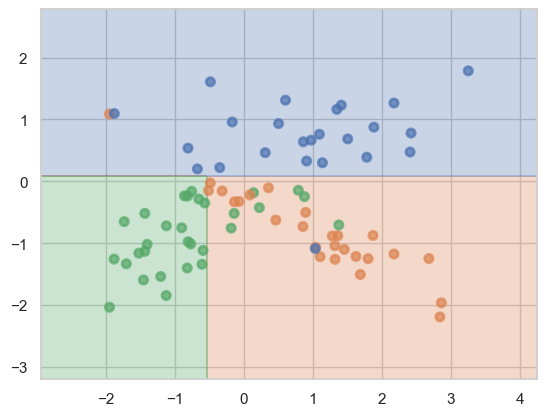

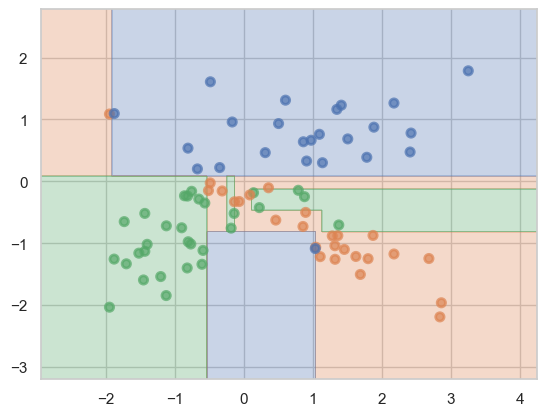

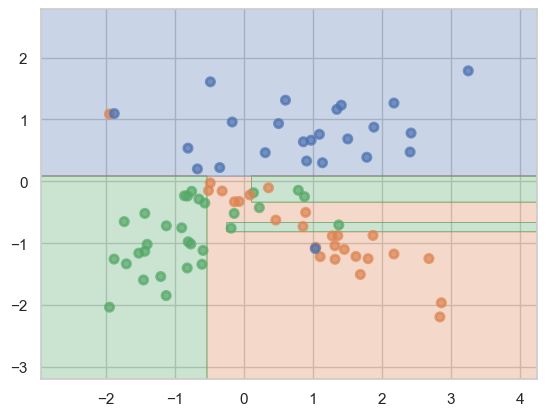

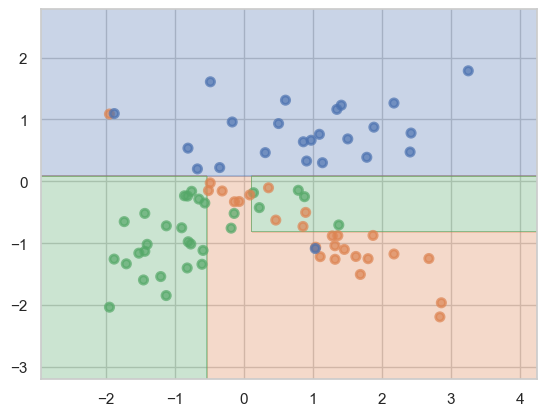

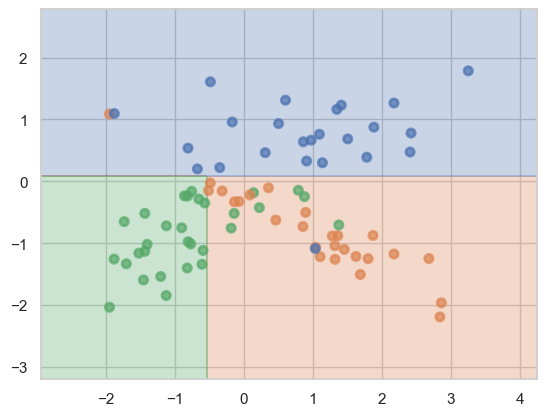

Dataset 1, Params: {'max_depth': 2, 'min_samples_leaf': 1}, Train Accuracy: 0.8125, Test Accuracy: 0.6
Dataset 1, Params: {'max_depth': 2, 'min_samples_leaf': 3}, Train Accuracy: 0.8, Test Accuracy: 0.65
Dataset 1, Params: {'max_depth': 2, 'min_samples_leaf': 5}, Train Accuracy: 0.8, Test Accuracy: 0.65
Dataset 1, Params: {'max_depth': 2, 'min_samples_leaf': 10}, Train Accuracy: 0.8, Test Accuracy: 0.65
Dataset 1, Params: {'max_depth': 4, 'min_samples_leaf': 1}, Train Accuracy: 0.9625, Test Accuracy: 0.75
Dataset 1, Params: {'max_depth': 4, 'min_samples_leaf': 3}, Train Accuracy: 0.925, Test Accuracy: 0.75
Dataset 1, Params: {'max_depth': 4, 'min_samples_leaf': 5}, Train Accuracy: 0.9125, Test Accuracy: 0.85
Dataset 1, Params: {'max_depth': 4, 'min_samples_leaf': 10}, Train Accuracy: 0.825, Test Accuracy: 0.9
Dataset 1, Params: {'max_depth': 6, 'min_samples_leaf': 1}, Train Accuracy: 1.0, Test Accuracy: 0.65
Dataset 1, Params: {'max_depth': 6, 'min_samples_leaf': 3}, Train Accuracy: 0.

In [18]:
from sklearn.model_selection import ParameterGrid

# Определяем параметры для перебора
param_grid = {
    'max_depth': [2, 4, 6, None],
    'min_samples_leaf': [1, 3, 5, 10]
}

results = []

# Перебираем параметры для каждого датасета
for i, (X, y) in enumerate(datasets):
    # Разбиваем датасет на обучающую и тестовую выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    for params in ParameterGrid(param_grid):
        # Обучаем решающее дерево с текущими параметрами
        clf = DecisionTreeClassifier(**params)
        clf.fit(X_train, y_train)
        
        # Вычисляем точность
        train_accuracy = clf.score(X_train, y_train)
        test_accuracy = clf.score(X_test, y_test)
        
        results.append((i, params, train_accuracy, test_accuracy))
        
        # Строим разделяющую поверхность
        plt.figure()
        plot_surface(clf, X_train, y_train)
        plt.show()
    
# Выводим результаты
for result in results:
    dataset_index, params, train_acc, test_acc = result
    print(f'Dataset {dataset_index+1}, Params: {params}, Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')

__Ответ:__ изменение неодинаково для всех датасетов, для каждого набора данных характерны свои особенности и гиперпараметры, которые по-разному влияют на способность к обобщению. Circles и MK CLSF требуют более тонкой настройки при тех же параметрах, в то время как Moons показывает лучшую обобщающую способность при разных гиперпараметраъх.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

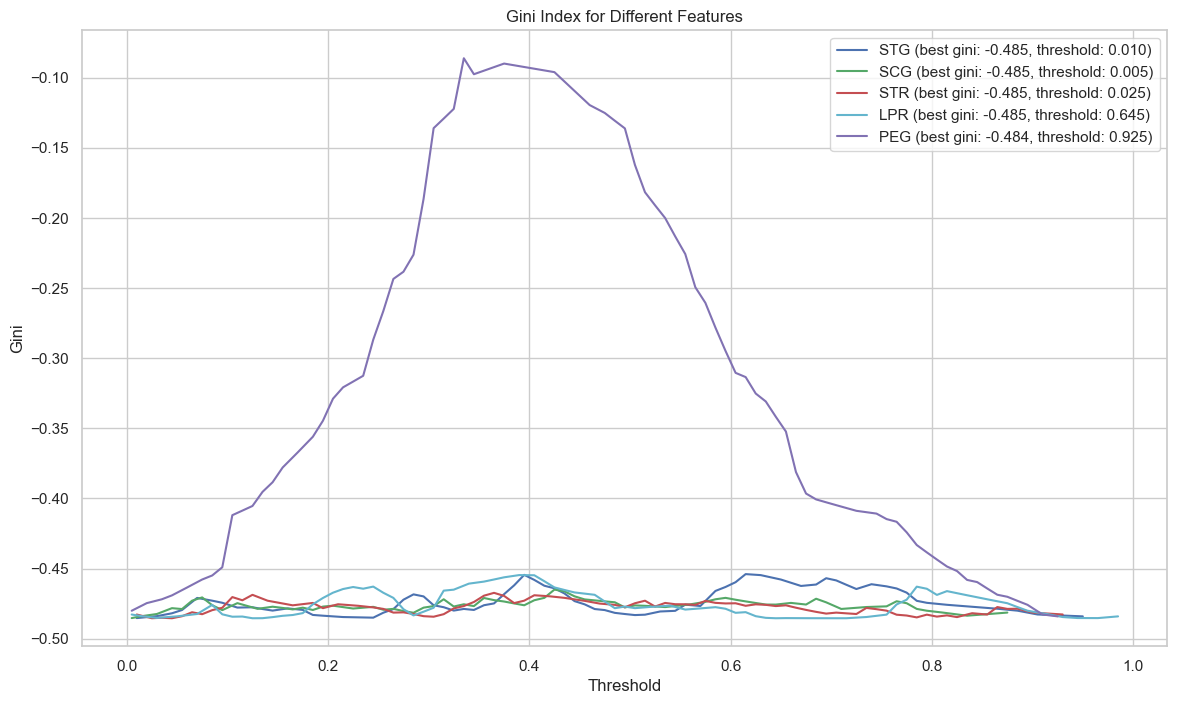

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tree_code import find_best_split  

df =  pd.read_csv('students.csv')

fig, ax = plt.subplots(figsize=(14, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    thresholds, ginis, best_threshold, best_gini = find_best_split(df[[feature]].to_numpy().flatten(), df[['UNS']].to_numpy().flatten())
    ax.plot(thresholds, ginis, label=f'{feature} (best gini: {best_gini:.3f}, threshold: {best_threshold:.3f})', color=colors[i])

# Настройка графика
ax.set_title('Gini Index for Different Features')
ax.set_xlabel('Threshold')
ax.set_ylabel('Gini')
ax.legend(loc='best')

# Отображение графика
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Следует разделить по PEG, что подтверждается визуальным анализом. На графике видно, что в районе 0.4 группы четко разделяются прямой линией. Хорошая кривая должна быть вогнутой и монотонно возрастать по мере удаления от точки минимума в обе стороны

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




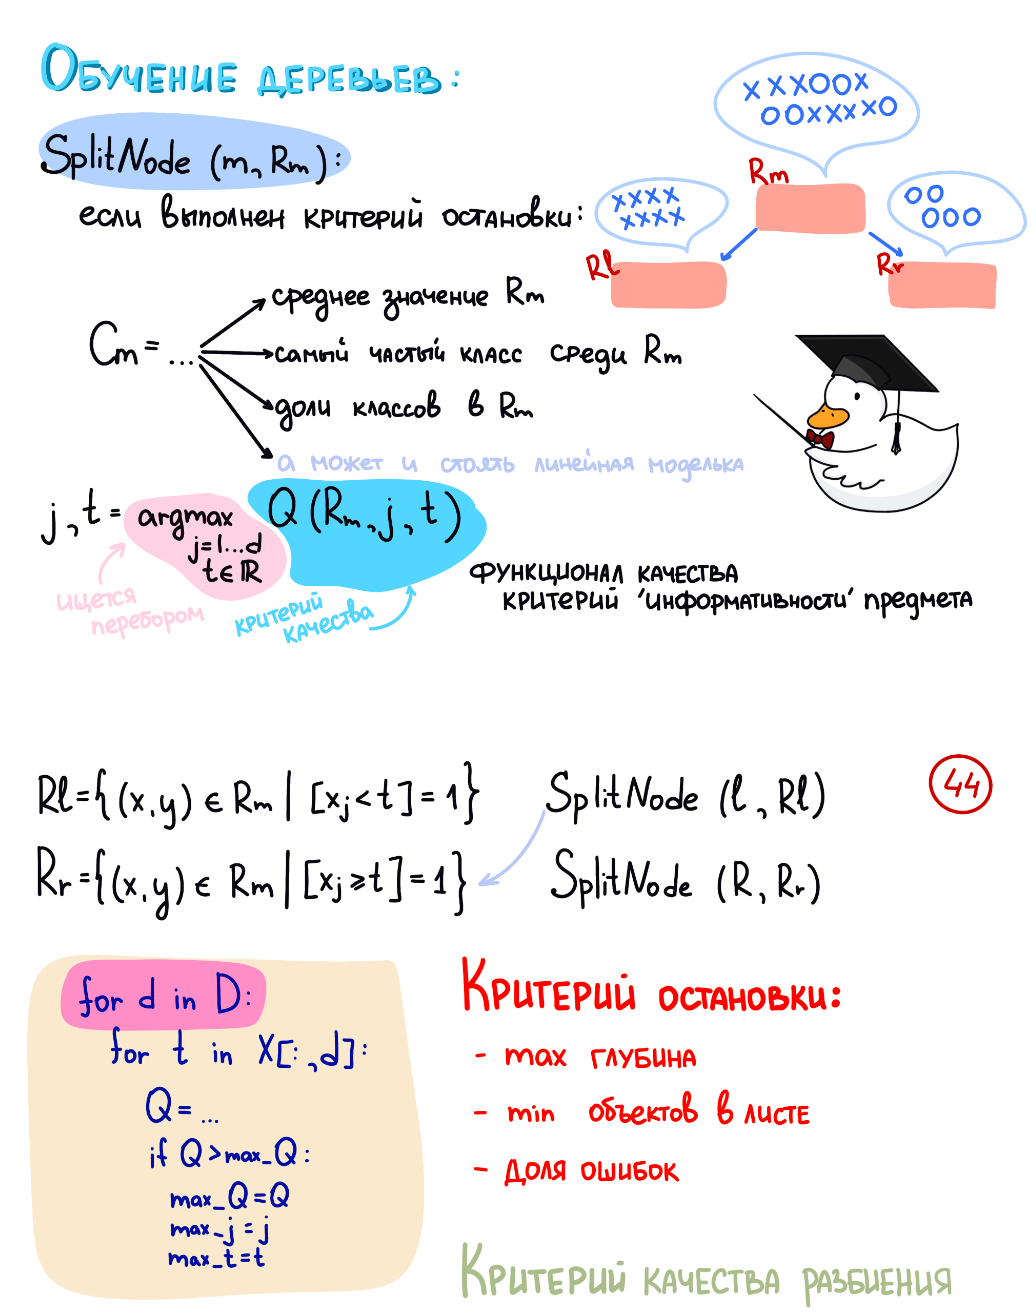

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ